In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [2]:
# Step 1: Load and preprocess the data
data = pd.read_csv('loan_data.csv')

In [3]:
# Feature Transformation
categorical_columns = ['purpose']
data = pd.get_dummies(data, columns=categorical_columns)

In [4]:
# Step 2: Exploratory Data Analysis (EDA)
# Perform EDA as per your requirements
print(data.head())
print(data.shape)
print(data.columns)
print(data.dtypes)
print(data.info())
print(data.describe())
print(data.duplicated().sum())
data.isna().sum()

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_all_other  purpose_credit_card  \
0        0               0              

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

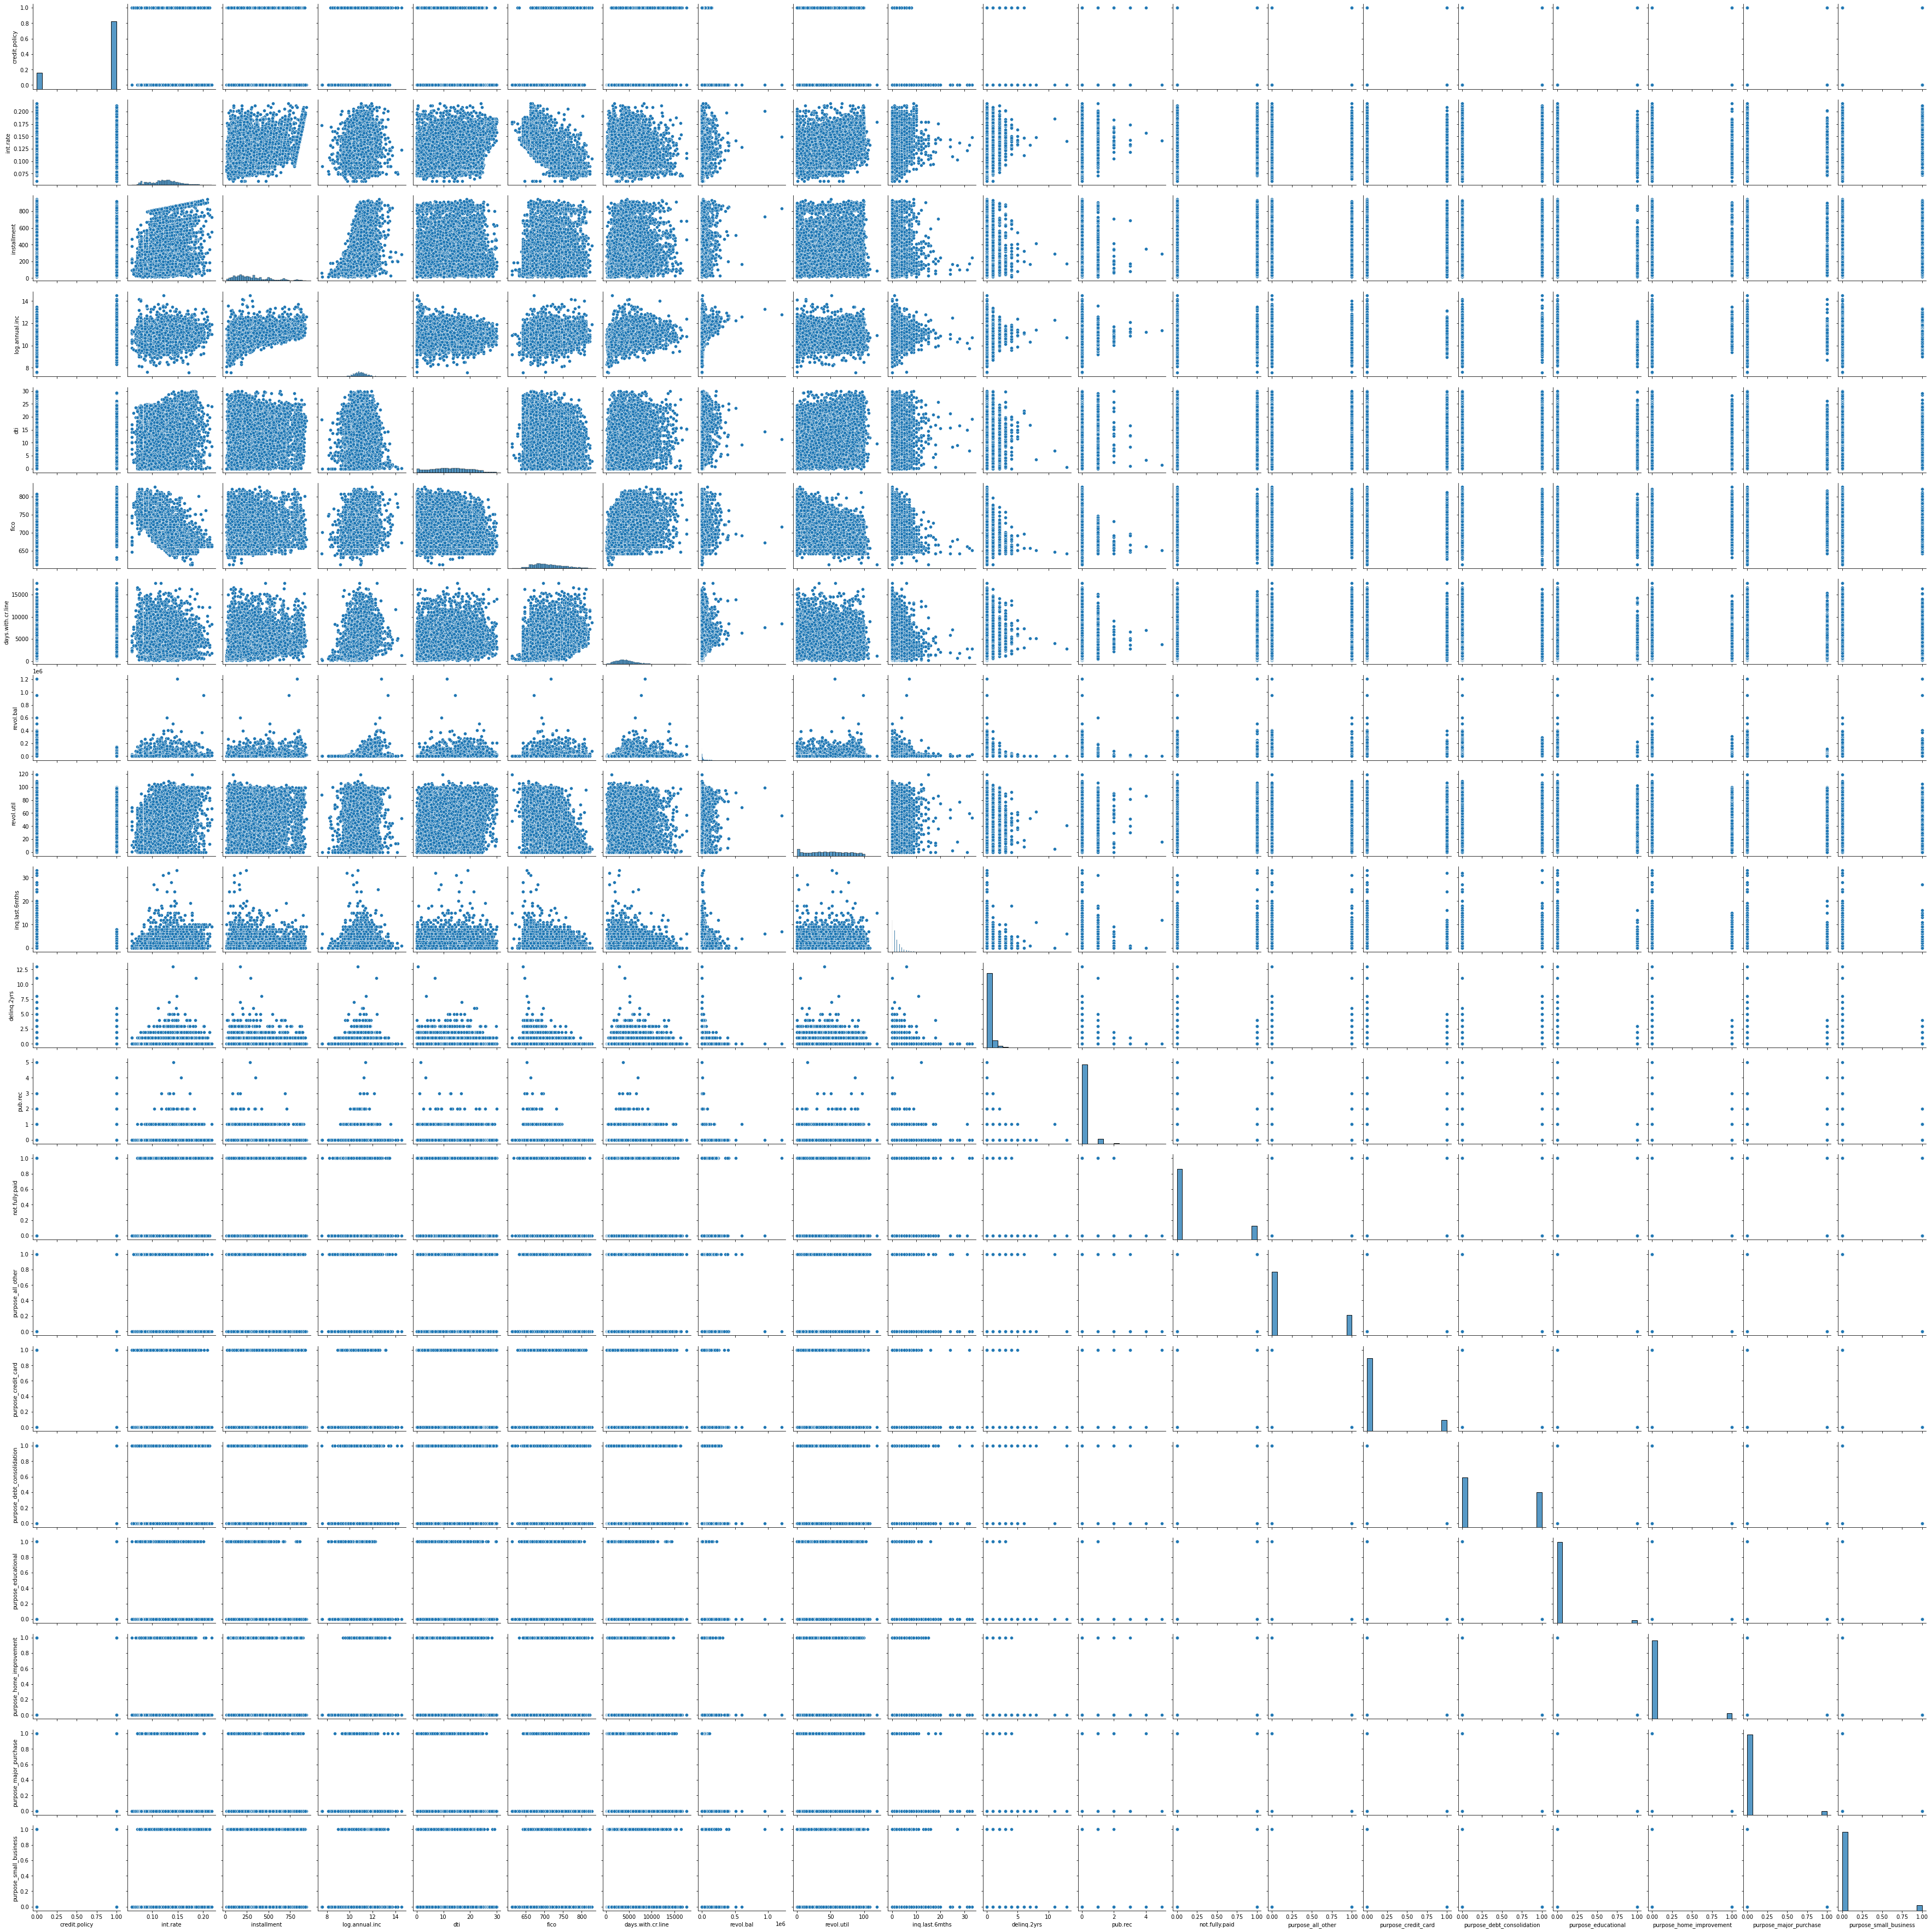

In [7]:
sns.pairplot(data)
plt.show()

In [8]:
# Step 3: Additional Feature Engineering
correlation_matrix = data.corr()
# Analyze correlation_matrix and drop features with strong correlations
correlation_matrix

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.124000,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.080077,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.056574,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.138535,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


In [9]:
# Define the correlation threshold
correlation_threshold = 0.8

# Create a set to store the features to be dropped
features_to_drop = set()

# Iterate over the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Check if the correlation exceeds the threshold
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            # Add the feature to the set of features to be dropped
            feature = correlation_matrix.columns[i]
            features_to_drop.add(feature)

# Drop the highly correlated features from the dataset
data = data.drop(features_to_drop, axis=1)

In [10]:
# Step 4: Modeling
# Split the data into features (X) and target (y)
X = data.drop('credit.policy', axis=1).values
y = data['credit.policy'].values

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Normalize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Convert the target variable into categorical (if needed)
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [14]:
# Build the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
240/240 [==============================] - 1s 1ms/step - loss: 0.3478 - accuracy: 0.8606
Epoch 2/10
240/240 [==============================] - 0s 1ms/step - loss: 0.2382 - accuracy: 0.9032
Epoch 3/10
240/240 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.9098
Epoch 4/10
240/240 [==============================] - 0s 1ms/step - loss: 0.2079 - accuracy: 0.9154
Epoch 5/10
240/240 [==============================] - 0s 1ms/step - loss: 0.1952 - accuracy: 0.9230
Epoch 6/10
240/240 [==============================] - 0s 1ms/step - loss: 0.1824 - accuracy: 0.9263
Epoch 7/10
240/240 [==============================] - 0s 1ms/step - loss: 0.1703 - accuracy: 0.9330
Epoch 8/10
240/240 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.9371
Epoch 9/10
240/240 [==============================] - 0s 1ms/step - loss: 0.1511 - accuracy: 0.9401
Epoch 10/10
240/240 [==============================] - 0s 1ms/step - loss: 0.1444 - accuracy: 0.9448

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

60/60 [==============================] - 0s 930us/step - loss: 0.1673 - accuracy: 0.9348
Test Loss: 0.1672971099615097
Test Accuracy: 0.9347599148750305


In [20]:
# Make predictions
predictions = model.predict(X_test)

# View the predictions
for i in range(0,15):
#for prediction in predictions:
    # Assuming the predicted values are binary (0 or 1)
    if predictions[i] >= 0.5:
        print("Default")
    else:
        print("Not Default")

Not Default
Default
Default
Not Default
Default
Default
Default
Default
Default
Default
Default
Default
Default
Default
Not Default
